In [1]:
import numpy as np
import pandas as pd
import re
from colorama import Fore, Back, Style

In [2]:
import bnlp

/home/khubayeeb_k/miniconda3/envs/venv/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [3]:
dataset = pd.read_excel('dataset/maya_dataset.xlsx', engine = 'openpyxl')

In [4]:
dataset = dataset.iloc[:, 0:2]

In [5]:
dataset.sample(5)

,posts,labels
4,আমার বয়স ৩৪ বছর।জীবনে সবকিছু আমার মত করে পেতে ...,2
1531,আমি ভাল নাই। এই অশান্তি থেকে কোনভাবেই বের হতে ...,1
684,ডিপ্রেশনের জন্য কোনো মেডিসিন সাজেস্ট করবেন? সা...,3
1038,আমি সবসমই মানসিক ভাবে বীসন্ন থাকি আমার ভেতরে স...,2
2468,আমি তে এক মেয়ে সাথে সমাপক কারছে আমাদের সমাপক ৮...,1


### Removing Emojis

In [6]:
df_1 = dataset.copy()

In [7]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F97A"
        u"\U00002639"
        u"\U00002764"
        u"\U0001F642"
        u"\U0001F600-\U000E007F"
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r' ',text)
for i in range(df_1.shape[0]):
    df_1.iloc[i,0] = deEmojify(df_1.iloc[i,0])

### <span style="color:darksalmon">Removing nan Fields</span>

In [8]:
df_1.isnull().sum(axis = 0)

posts     0
labels    0
dtype: int64

### <span style="color:aqua">Removing Punctuations</span>

In [9]:
df_2 = df_1.copy()

In [10]:
def depunctuate(text):
    regrex_pattern = re.compile(pattern = "["u"\/"u"\\"u"\^"u"\!"u"\@"u"\+"u"\*"u"\="u"\%"u"\&"u"\:"u"\;"u"\_"u"\."u"\,"u"\("u"\)"u"\?"u"\।"u"\|"u"'"u"\-"u"\""u"]+")
    return regrex_pattern.sub(r' ',text)
for i in range(df_2.shape[0]):
    df_2.iloc[i,0] = depunctuate(df_2.iloc[i,0])

In [11]:
df_2.sample(5)

,posts,labels
4122,আমার শরীর অতিরিক্ত দুর্বল অনুভব করি হাটতে লাগল...,1
550,আমি ইদানিং ডিপ্রেশনে আছি কি করব কিছু বুঝে উঠতে...,2
3791,আপা আমার একা থাতেনকেন ভাল লাগে আমি একা থাকতে ড...,1
4585,ডাক্তার তো অনেক দেখিয়েছি তারা তেমন কোন রোগ পান...,3
2007,আমার মন ভালো লাগে না কারো সাথে কথা বলতে বা কার...,1


### <span style="color:red">Removing Numbers</span>

In [12]:
df_3 = df_2.copy()

In [13]:
def denumerize(text):
    regrex_pattern = re.compile(pattern = "[0-9০১২৩৪৫৬৭৮৯]+")
    return regrex_pattern.sub(r' ',text)
for i in range(df_3.shape[0]):
    df_3.iloc[i,0] = denumerize(df_3.iloc[i,0])

In [14]:
df_3.sample(5)

,posts,labels
1961,আমার মন সব সময় খারাপ থাকে কি করতে পারি,2
3896,আমার মনে হচ্ছে আমার মাথা ব্লক হয়ে গেছে আমি যতই...,4
417,খুব একা লাগে ডিপ্রেশন কাজ করে মনে হয় মৃত্যু হল...,4
69,আমি বেশিরভাগ সময়ই হতাশার মধ্যে থাকি এবং টেনশন...,2
3476,যে কোনো ছোটখাটো বিষয় নিয়ে ডিপ্রশেষন থাকি খুব ...,2


### <span style="color:hotpink">Discarding all Posts Beyond the Range of Acceptable Length </span>

In [15]:
df_4 = df_3.copy()

In [16]:
def remove_empty_string_literals(string_list):
    while("" in string_list) :
        string_list.remove("")
    return string_list

In [17]:
df_4['length'] = [len(remove_empty_string_literals(post.split(' '))) for post in df_4.iloc[:, 0]] 

In [18]:
df_4.sample(5)

,posts,labels,length
3874,আমি যাকে ভালোবাসি তারসাথে যোহাযোহ করার সব রকম ...,1,36
958,আমার ভালবাসার সম্পর্ক বছরের বেশি হলো গত ম...,1,43
309,প্রিয় মানুষের মন খারাপ এখন তার মন ভালো করার...,1,37
3630,পারিবারিক ঝামেলা প্রচুর এদিকে অর্থনৈতিক ভাবেও...,4,64
620,আমার বয়স বছর সামান্য কিছু তে আমি প্রচুর কান...,3,49


In [19]:
# Defining an acceptable range for the length of posts -> inclusive
LOWER_BOUND = 5
UPPER_BOUND = 300
df_5 = df_4[(df_4['length'] >= LOWER_BOUND) == True]
df_5 = df_5[(df_5['length'] <= UPPER_BOUND) == True]
print(df_5.shape)

(4871, 3)


In [20]:
df_5.sample(5)

,posts,labels,length
198,আমি এখন নিজেকে খুব একাকিত্ম অনুভব করি আমি পড়া...,2,34
2772,আমি ব্যাংকে জব করি সারাদিনের ক্লান্তি আর কাজে...,2,29
2978,প্লিজ আপনি বললে ভাল হবে আপনার দেওয়া উওর গুলো ...,3,77
1502,দীর্ঘদিন যাবৎ মানসিক সমস্যার ভিতরে রয়েছে আমি ...,2,18
4734,আমি মানসিক সমস্যায় ভুগছি আমার করণীয় কি,2,7


### <span style="color:orange">Tokenizing Dataset</span>

In [21]:
from bnlp import BasicTokenizer
tokenizer = BasicTokenizer()
# Replace df_5 with df_x to revert the effects of text cleaning
x, y = df_5.iloc[:, 0:1].values, df_5.iloc[:, 1:2].values
x = x.tolist()
for i in range(len(x)):
    x[i] = tokenizer.tokenize(x[i][0])

### <span style="color:deeppink">Visualizing Word Frequency Distribution</span>

In [22]:
words = [word for words in x for word in words]

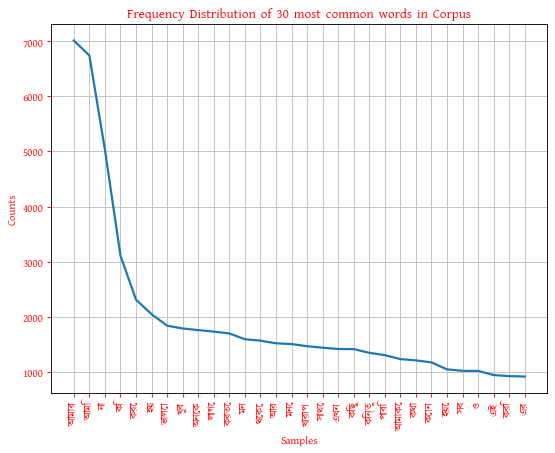

In [23]:
from nltk.probability import FreqDist
import matplotlib
import matplotlib.font_manager as font_manager
from matplotlib import rcParams
from matplotlib.pyplot import figure

matplotlib.rcParams.update(matplotlib.rcParamsDefault)
figure(figsize=(8, 6), dpi=80)
font_dir = ['kalpurush/']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
rcParams['font.family'] = 'kalpurush'
rcParams.update({'text.color' : "red",
                 'axes.labelcolor' : "red",
                 'xtick.color' : "red",
                 'ytick.color' : "red",
                 'xtick.minor.width' : 2})
freq_dist = FreqDist(words)
freq_dist.plot(30, title = "Frequency Distribution of 30 most common words in Corpus")
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

### <span style="color:gold">Visualizing Post Length Frequency Distribution</span>

In [24]:
lens = [len(posts) for posts in x]
lens = pd.Series(lens, name = "post length")

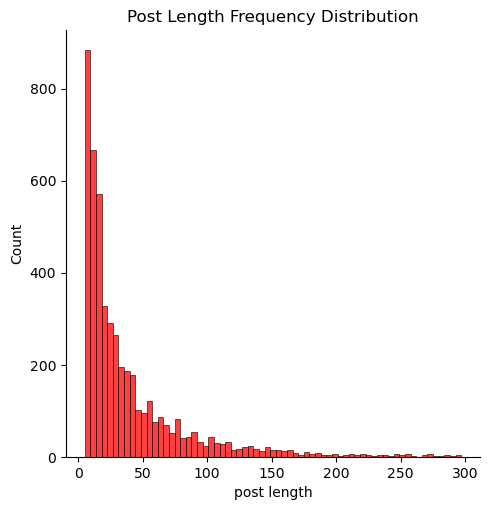

In [25]:
import seaborn as sns
sns.displot(lens, color = 'r').set(title = 'Post Length Frequency Distribution')
import matplotlib.pyplot as plt
plt.show()

### <span style="color:deepskyblue">Visualizing Label Counts</span>

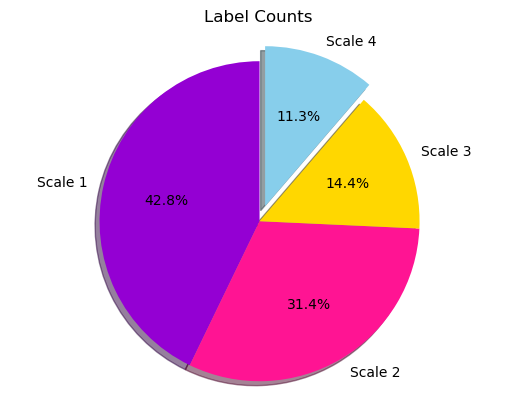

In [26]:
counts = df_3['labels'].value_counts().to_dict()
import matplotlib.pyplot as plt
labels = 'Scale 1', 'Scale 2', 'Scale 3', 'Scale 4'
sizes = [counts[1], counts[2], counts[3], counts[4]]
colors = ['#9400D3','#FF1493','#FFD700','#87CEEB']
explode = (0, 0, 0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, 
        autopct = '%1.1f%%', 
        shadow = True, 
        startangle = 90,
        colors = colors)
ax1.axis('equal')
plt.title('Label Counts')
plt.show()

### <span style="color:crimson">Spell Correction using FastText</span>

<font>Source:
    https://medium.com/analytics-vidhya/bengali-word-spelling-correction-using-pre-trained-word2vec-1f9938f48b09
</font>

- letters = The Bengali script has a total of 9 vowels. Each of which is called a ‘স্বরবর্ণ’. Also, have 35 consonants that are known as ‘ব্যঞ্জনবর্ণ ‘.

- splits = It is working as a list which has both forward and reverses orders of the word sequence.

- deletes = Also, a list which checks the left and right of a word in splits list and deletes the incorrect syntax.

- transposes = It is used to change word places with each other words using the splits list.

- replaces = Is a list it put words back in a previous place or position.

- inserts = It helps to place and fit the correct words into the replacing with the incorrect word, especially with care.

In [27]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('models/cc.bn.300.vec')

In [28]:
words = model.index_to_key
word_rank = {}
for index, word in enumerate(words):
    word_rank[word] = index

In [29]:
# This methods returns the value for the given key, if present in the dictionary using the get() method
def P(word): 
    return - word_rank.get(word, 0)

#  It returns the maximum candidates words with a key which is defined by P
def correction(word): 
    return max(candidates(word), key=P)

# The absolute candidate of the wrong word could found from known() methods is the actual work of this function.
def candidates(word): 
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

# This method is used to find out the set of a word which is present in the dictionary
def known(words): 
    return set(w for w in words if w in word_rank)

# Many parameters such as deletes, transposes, replaces, inserts are used in this method.
# Those parameters return the correct word of an incorrect word in a sentence.
# A set() function is used to find out the unordered collection of words
def edits1(word):
    letters    = 'ঁংঃঅআইঈউঊঋএঐওঔকখগঘঙচছজঝঞটঠডঢণতথদধনপফবভমযরলশষসহ়ঽািীুূৃৄেৈোৌ্ৎৗড়ঢ়য়'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)
    
#  This method is returend the word which is edited by in edits1() functions
def edits2(word): 
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [30]:
def spell_correction(sentence):
    corrected_sentence = []
    for word in sentence:
        corrected_sentence.append(correction(word))
    return re.sub(' +' ,' ', ' '.join(corrected_sentence))

In [31]:
from bnlp import BasicTokenizer
tokenizer = BasicTokenizer()
x = df_5.iloc[:, 0:1].values
x = x.tolist()
for i in range(len(x)):
    x[i] = tokenizer.tokenize(x[i][0])
for i in range(df_5.shape[0]):
    df_5.iloc[i, 0] = spell_correction(x[i])

In [32]:
df_5.sample(5)

,posts,labels,length
3112,আমার কিছুই ভালো লাগেনা কোনো কাজে উৎসাহ আগ্রহ প...,1,27
2952,একাকীত্ব দূর করার জন্য কি কি করা যায়,1,8
3339,আমার সব সময় মন মরা থাকে মানসিক অশান্তি আমি কি করব,1,11
1260,আমি সিজোফ্রেনিয়া রোগে আক্রান্ত ছিলাম যা অনেকটা...,4,33
2996,আমি রিসেন্টলি একটা প্রাইভেট মেডিকেল এ ভর্তি হই...,4,136


### <span style="color:coral">Removing Stopwords</span>

In [33]:
from bnlp.corpus.util import remove_stopwords

In [34]:
file = open('stopwords/stopwords-bn.txt', encoding = 'utf-8')
stopwords = []
for line in file:
    stopwords.append(line.strip())
file.close()
stopwords = list(filter(None, stopwords))

In [35]:
df_6 = df_5.iloc[:, 0:2].copy()

In [36]:
for i in range(df_6.shape[0]):
    df_6.iloc[i, 0] = ' '.join(remove_stopwords(df_6.iloc[i, 0], stopwords))

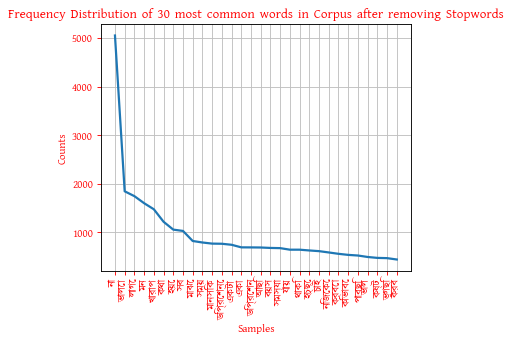

In [37]:
# Revisualizing Word Frequency Distribution after removing Stopwords
from bnlp import BasicTokenizer
tokenizer = BasicTokenizer()
# Replace df_5 with df_x to revert the effects of text cleaning
x, y = df_6.iloc[:, 0:1].values, df_6.iloc[:, 1:2].values
x = x.tolist()
for i in range(len(x)):
    x[i] = tokenizer.tokenize(x[i][0])

words = [word for words in x for word in words]

matplotlib.rcParams.update(matplotlib.rcParamsDefault)
figure(figsize=(5, 4), dpi=80)
font_dir = ['kalpurush/']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
rcParams['font.family'] = 'kalpurush'
rcParams.update({'text.color' : "red",
                 'axes.labelcolor' : "red",
                 'xtick.color' : "red",
                 'ytick.color' : "red",
                 'xtick.minor.width' : 2})
freq_dist = FreqDist(words)
freq_dist.plot(30, title = "Frequency Distribution of 30 most common words in Corpus after removing Stopwords")
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

### <span style="color:gold">Creating Sparse Matrix</span>

In [38]:
corpus = df_6.iloc[:, 0].values
y = df_6.iloc[:, 1].values

In [39]:
df_6.sample(5)

,posts,labels
2738,পরিবারের বুঝতে চায়না এমনকি স্ত্রীও না মানুষিক ...,2
4257,দুঃচিন্তা রোগে গত মাস ভুগেছি আনান্দ ভুলে গেছি ...,3
1295,অশান্তি তে থাকি হাসব্যান্ড দূরে বছরের পরিচয় রে...,2
2929,মানসিক সমস্যার কারনে ঘুম আসে না,2
774,মন সারাখন খারাপ আত্যহত্যা ইচ্ছে সব সময় পেতে,4


In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(corpus, y, test_size=0.2)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000)
x_train = cv.fit_transform(x_train).toarray()
x_test = cv.transform(x_test)

### <span style="color:cyan">Creating TF-IDF Feature Vector</span>

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
x_tfidf_train, x_tfidf_test, y_tfidf_train, y_tfidf_test=train_test_split(corpus, y, test_size=0.2)

In [42]:
#### Make it BIGRAM
tf_idf = TfidfVectorizer(encoding = 'utf-8', lowercase = False, norm = 'l2', sublinear_tf = True, min_df = 2, ngram_range = (1, 2))
x_tfidf_train = tf_idf.fit_transform(x_tfidf_train).toarray().tolist()
x_tfidf_test = tf_idf.transform(x_tfidf_test).toarray().tolist()

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.20)

### <span style="color:pink">Random Forest + TF-IDF</span>

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight = 'balanced',
                                                 classes = np.unique(np.reshape(y_tfidf_train, y_tfidf_train.shape[0])),
                                                 y = np.reshape(y_tfidf_train, y_tfidf_train.shape[0]))
class_weights = {1 : class_weights[0],
               2 : class_weights[1],
               3 : class_weights[2],
               4 : class_weights[3]}
classifier = RandomForestClassifier(n_estimators = 25000, verbose = 1, class_weight = class_weights,
                                    n_jobs = 6)
classifier.fit(x_tfidf_train, y_tfidf_train)
y_tfidf_pred = classifier.predict(x_tfidf_test)
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_tfidf_test, y_tfidf_pred)
cr = classification_report(y_tfidf_test, y_tfidf_pred)
print('Classification Report', cr, sep = '\n')
print('Confusion Matrix', cm, '', sep = '\n')
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print(Fore.RED+'F1 score (macro):', f1_score(y_tfidf_test, y_tfidf_pred, average = 'macro'))
print(Fore.RED+'F1 score (weighted):', f1_score(y_tfidf_test, y_tfidf_pred, average = 'weighted'))
print(Fore.RED+'F1 score (micro):', f1_score(y_tfidf_test, y_tfidf_pred, average = 'micro'))
print(Fore.RED+'Accuracy:', accuracy_score(y_tfidf_test, y_tfidf_pred))

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    1.3s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    5.4s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:   12.1s
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed:   21.8s
[Parallel(n_jobs=3)]: Done 1244 tasks      | elapsed:   34.2s
[Parallel(n_jobs=3)]: Done 1794 tasks      | elapsed:   49.3s
[Parallel(n_jobs=3)]: Done 2444 tasks      | elapsed:  1.1min
[Parallel(n_jobs=3)]: Done 3194 tasks      | elapsed:  1.5min
[Parallel(n_jobs=3)]: Done 4044 tasks      | elapsed:  1.9min
[Parallel(n_jobs=3)]: Done 4994 tasks      | elapsed:  2.3min
[Parallel(n_jobs=3)]: Done 6044 tasks      | elapsed:  2.8min
[Parallel(n_jobs=3)]: Done 7194 tasks      | elapsed:  3.4min
[Parallel(n_jobs=3)]: Done 8444 tasks      | elapsed:  3.9min
[Parallel(n_jobs=3)]: Done 9794 tasks      | elapsed:  4.6min
[Parallel(n_jobs=3)]: Done 11244 tasks      | elapsed:  

Classification Report
              precision    recall  f1-score   support

           1       0.76      0.95      0.84       419
           2       0.71      0.77      0.74       313
           3       0.79      0.22      0.34       141
           4       0.93      0.63      0.75       102

    accuracy                           0.75       975
   macro avg       0.80      0.64      0.67       975
weighted avg       0.76      0.75      0.73       975

Confusion Matrix
[[398  19   1   1]
 [ 67 242   3   1]
 [ 39  68  31   3]
 [ 22  12   4  64]]

F1 score (macro): 0.668842915136976
F1 score (weighted): 0.7276842434112674
F1 score (micro): 0.7538461538461538
Accuracy: 0.7538461538461538


[Parallel(n_jobs=3)]: Done 25000 out of 25000 | elapsed:    7.0s finished


## END